# An analysis of housing data in King County Washington.

### Presented by: Data Chef Partners

 Objective: To help small businesses identify profitable areas in their chosen county
 Insurance Agencies:
- identify potential lead hotspots
- areas suited to carrier appetites 
- potential commercial business hotspots
 Mortgage Brokers
- identify hotspots for marketing drops
- identify areas of


In [1]:
# Setting up the workspace by importing all of the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import folium
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and getting a first look at it's structure and contents
df = pd.read_csv('kc_house_data.csv')
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   
6      6819     2.0         0.0   0.0     ...          7        1715   
7      9711     1.0         0.0   NaN     ...          7        1060   
8      7470     1.0         0.0   0.0     ...          7        1050   
9      6560     2.0         0.0   0.0     ...          7        1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

In [3]:
# Taking a look at the types of data and the information about the different columns
# Identifying extraneous values that may need to be removed or altered for cleaner processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### Initial Data impressions:<br>
- __*id*__ is simply an identifier<br>
    This will be removed as it is not pertinent to the data analysis.<br>
- __*date*__ is a string.<br>
    Our initial impression is that it is simply the date that row was entered into the database.<br>
    This should be converted to a numerical value if it is a key data point.<br>
- There are two columns related to the size, __*sqft_living and sqft_lot*__ <br>
    We will explore their relationship and determine if they are dependent on each other or not<br>
- __*floors*__ is a numerical value.<br>
    Based on our knowledge of houses we believe this may be better suited to a categorical value.<br>
    We will explore the data and convert it to either a single or multiple<br> 
    or decide if each value of floors needs it's own category.<br>
- __*waterfront*__ is definitely categorical sine a home can only be either on or off the water.<br>
    We will convert this to a binary value to represent either on or off the water.<br>
- __*sqft_basement*__ <br>
    This along with __*sqft_above*__ combined are the same as __*sqft_living*__ so we will drop it<br>
    from the dataset since the presence of a basement is more significant than the size.<br>
    'sqft_basement will then be converted to categories which will identify the presence of a basement<br>
- __*zipcode*__ and __*lat long*__ are both location data.<br>
    We will determine if both are necessary and treat them accordingly<br>
- __*yr_renovated*__ has many null values so they will be replaced<br>


### Scrubbing the Data!!

*Waterfront*

In [5]:
# 'waterfront' is either True "1" or False "0".
# here we are changing all of the Null values to 0 to facilitate this
df.waterfront = df.waterfront.fillna(0)

*ID*

In [6]:
# 'id' is an arbitrary value which is unnecesary for analysis
# here we are removing it from the dataset
df.drop(['id'], axis=1, inplace=True)


*View*

In [7]:
# 'view' has some null values, so we will replace those with the assumption
#  that the null values represent the property not being viewed.
df.view = df['view'].fillna(0)

   *Sqft_basement*

In [8]:
# 'sqft_basement' has some placeholders. Here we are removing those
# This also needs to be converted to numerical values for analysis
# 'sqft_above' is arbitrary since it is included in 'sqft_living' so will drop it
df.sqft_basement.replace(to_replace='?', value='0', inplace=True)
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)
df.drop(['sqft_above'], axis=1, inplace=True)

In [9]:
# We foound one record that did not have valid data, so this was dropped.
df.drop(index=15856, inplace=True)

In [10]:
# 'yr_renovated' has some placeholders so we are converting them to '0'
df.yr_renovated = df['yr_renovated'].fillna(0)

In [11]:
# sqft_lot15 is the same as sqft_lot so we will remove it for the analysis
df.drop(['sqft_lot15'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

### Looking over the Clean, Shiny Data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
dtypes: float64(9), int64(8), object(1)
memory usage: 3.1+ MB


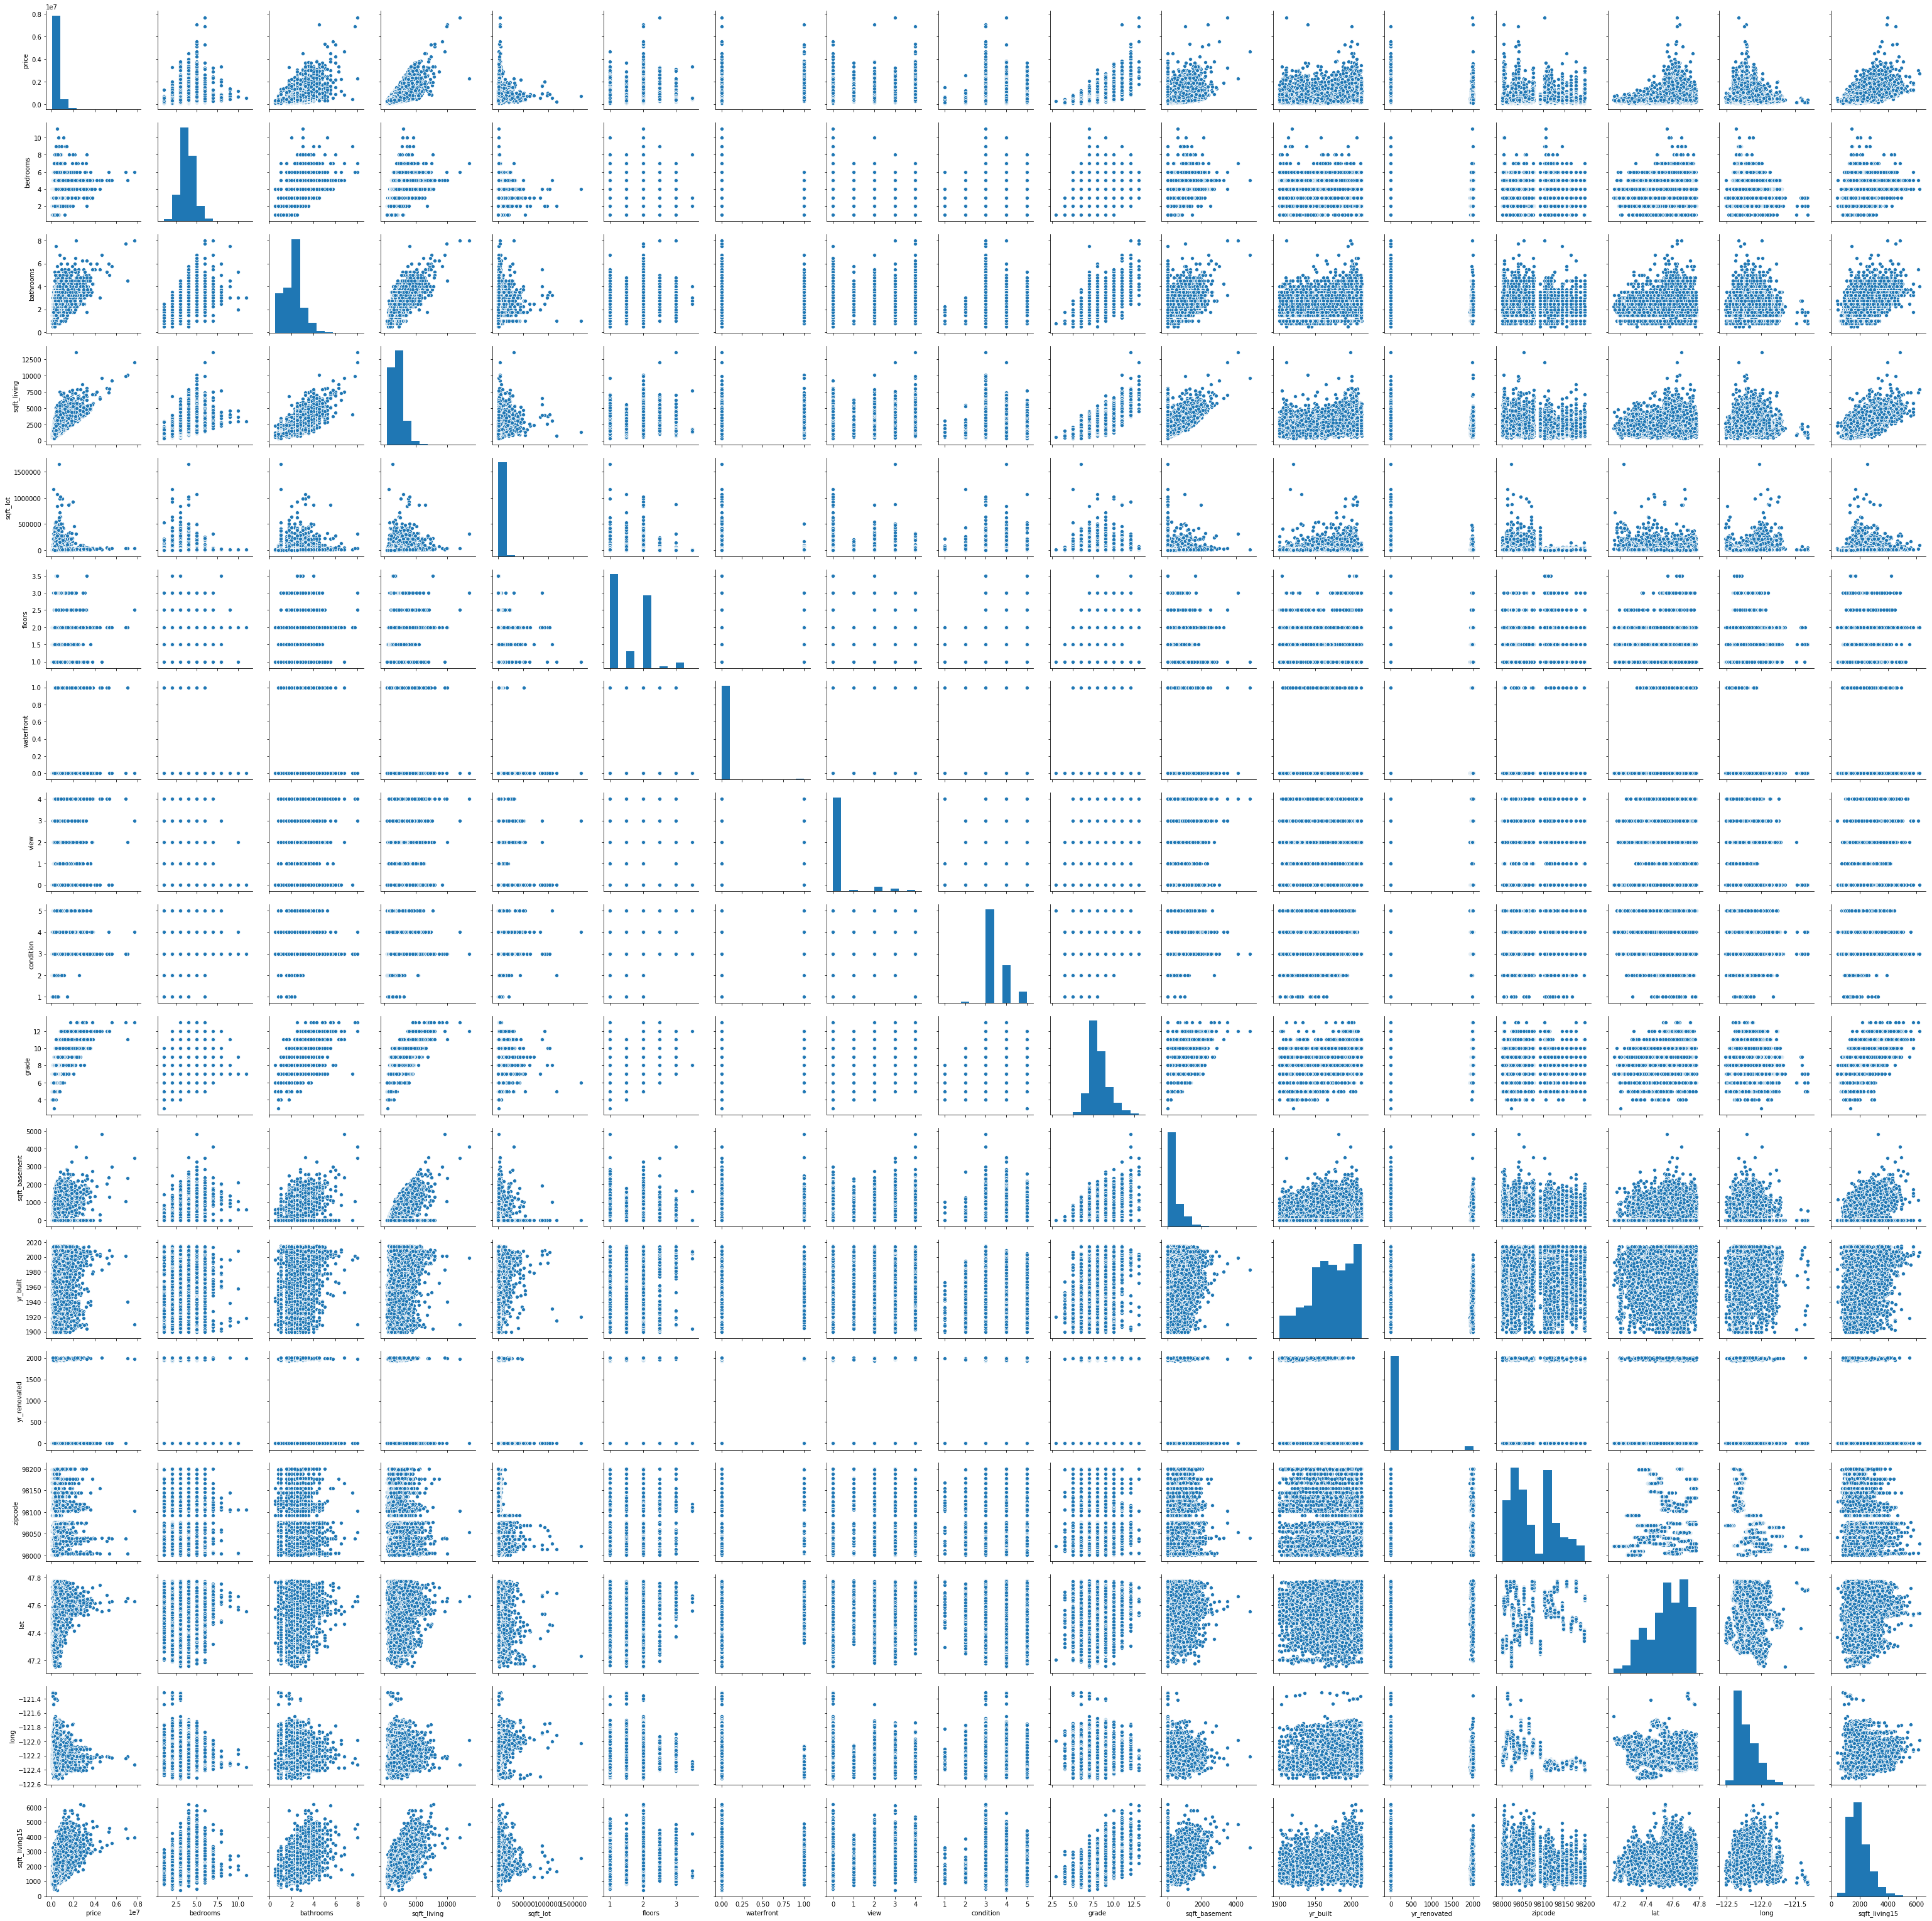

In [19]:
# Taking an initial look at the basic statistics of the data set
df.info()
sns.pairplot(df)

### We have some distinctive categorical variables, so we will convert them here.


### Creating our Working file and beginning to look at the numbers

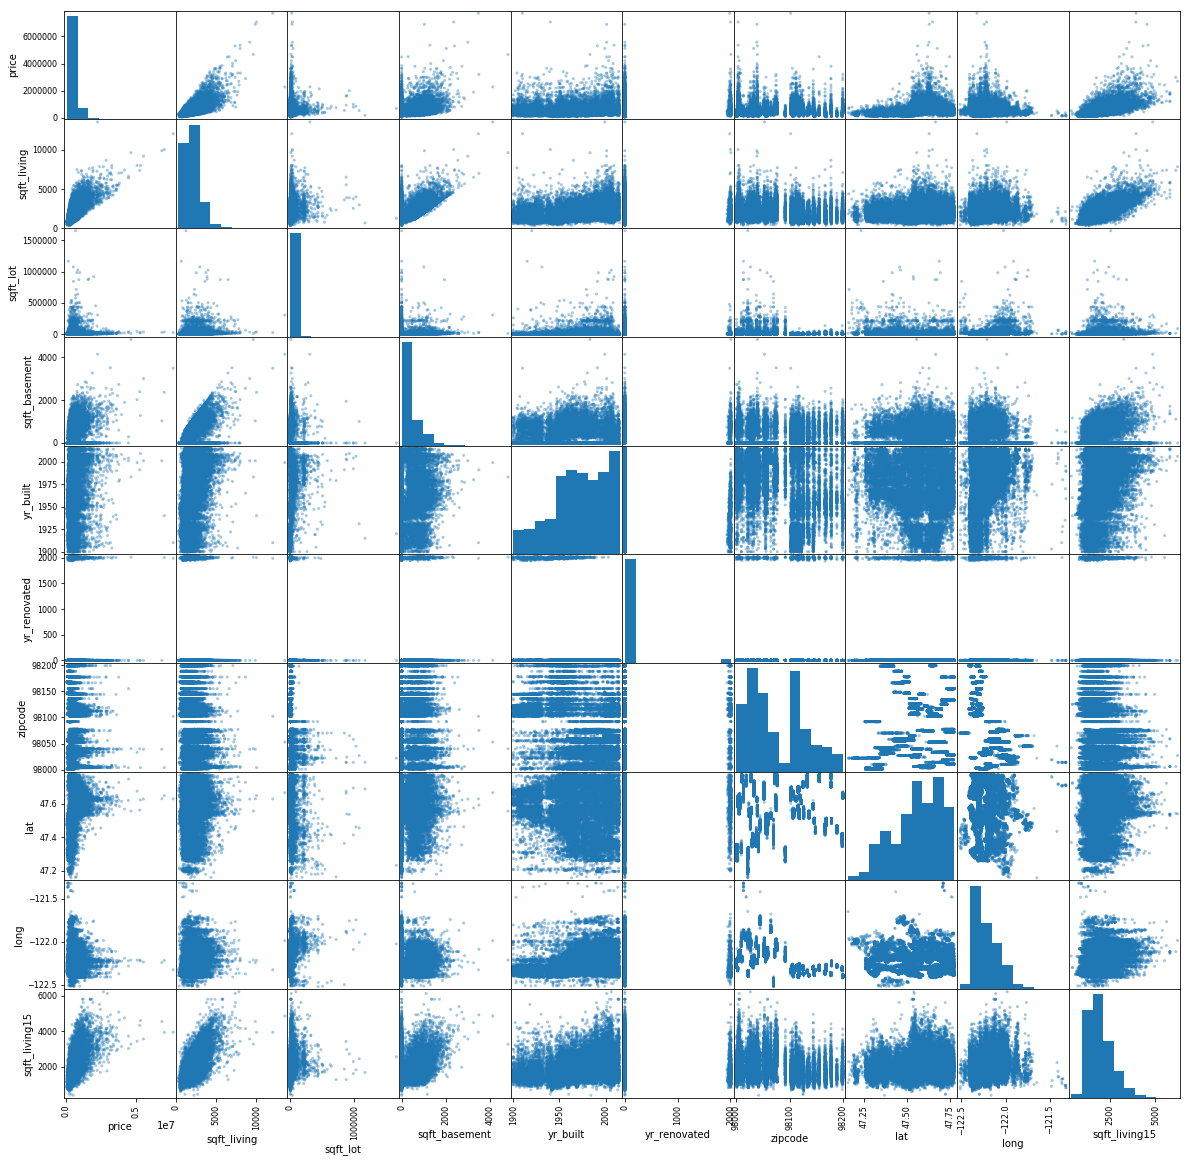

In [24]:
df_features = df
pd.scatter_matrix(df_features, alpha=0.4, figsize=(20, 20))
plt.show()

### Looking at the plots above, we have determined that we will look further into:
- __*bathrooms*__
- __*sqft_living*__
- __*bedrooms*__
- __*lat & long*__ <br>
as they relate to our target __*price*__

### Now to check for Mulitcolilnearity
 using the Pearson test, we can look for high correlation between two variables<br>
 to determine if they represent the same data.<br> 
 We will look at the values at 75% or higher and determine if we should drop one 

In [25]:
df_features.corr()

price  sqft_living  sqft_lot  sqft_basement  yr_built  \
price          1.000000     0.701929  0.089879       0.321103  0.053965   
sqft_living    0.701929     1.000000  0.173449       0.428683  0.318140   
sqft_lot       0.089879     0.173449  1.000000       0.015038  0.052939   
sqft_basement  0.321103     0.428683  0.015038       1.000000 -0.130063   
yr_built       0.053965     0.318140  0.052939      -0.130063  1.000000   
yr_renovated   0.117858     0.051056  0.004977       0.065014 -0.202565   
zipcode       -0.053409    -0.199793 -0.129582       0.073257 -0.347199   
lat            0.306687     0.052178 -0.085507       0.109828 -0.148340   
long           0.022047     0.241200  0.230222      -0.142347  0.409974   
sqft_living15  0.585267     0.756400  0.144756       0.199324  0.326353   

               yr_renovated   zipcode       lat      long  sqft_living15  
price              0.117858 -0.053409  0.306687  0.022047       0.585267  
sqft_living        0.051056 -0.199793  0.052178  0.241200       0.756400  
sqft_lot           0.004977 -0.129582 -0.085507  0.230222       0.144756  
sqft_basement      0.065014  0.073257  0.109828 -0.142347       0.199324  
yr_built          -0.202565 -0.347199 -0.148340  0.409974       0.326353  
yr_renovated       1.000000  0.062402  0.027979 -0.064551       0.000675  
zipcode            0.062402  1.000000  0.266729 -0.564253      -0.279286  
lat                0.027979  0.266729  1.000000 -0.135340       0.048721  
long              -0.064551 -0.564253 -0.135340  1.000000       0.335601  
sqft_living15      0.000675 -0.279286  0.048721  0.335601       1.000000

In [26]:
abs(df_features.corr()) >.75


price  sqft_living  sqft_lot  sqft_basement  yr_built  \
price           True        False     False          False     False   
sqft_living    False         True     False          False     False   
sqft_lot       False        False      True          False     False   
sqft_basement  False        False     False           True     False   
yr_built       False        False     False          False      True   
yr_renovated   False        False     False          False     False   
zipcode        False        False     False          False     False   
lat            False        False     False          False     False   
long           False        False     False          False     False   
sqft_living15  False         True     False          False     False   

               yr_renovated  zipcode    lat   long  sqft_living15  
price                 False    False  False  False          False  
sqft_living           False    False  False  False           True  
sqft_lot              False    False  False  False          False  
sqft_basement         False    False  False  False          False  
yr_built              False    False  False  False          False  
yr_renovated           True    False  False  False          False  
zipcode               False     True  False  False          False  
lat                   False    False   True  False          False  
long                  False    False  False   True          False  
sqft_living15         False    False  False  False           True

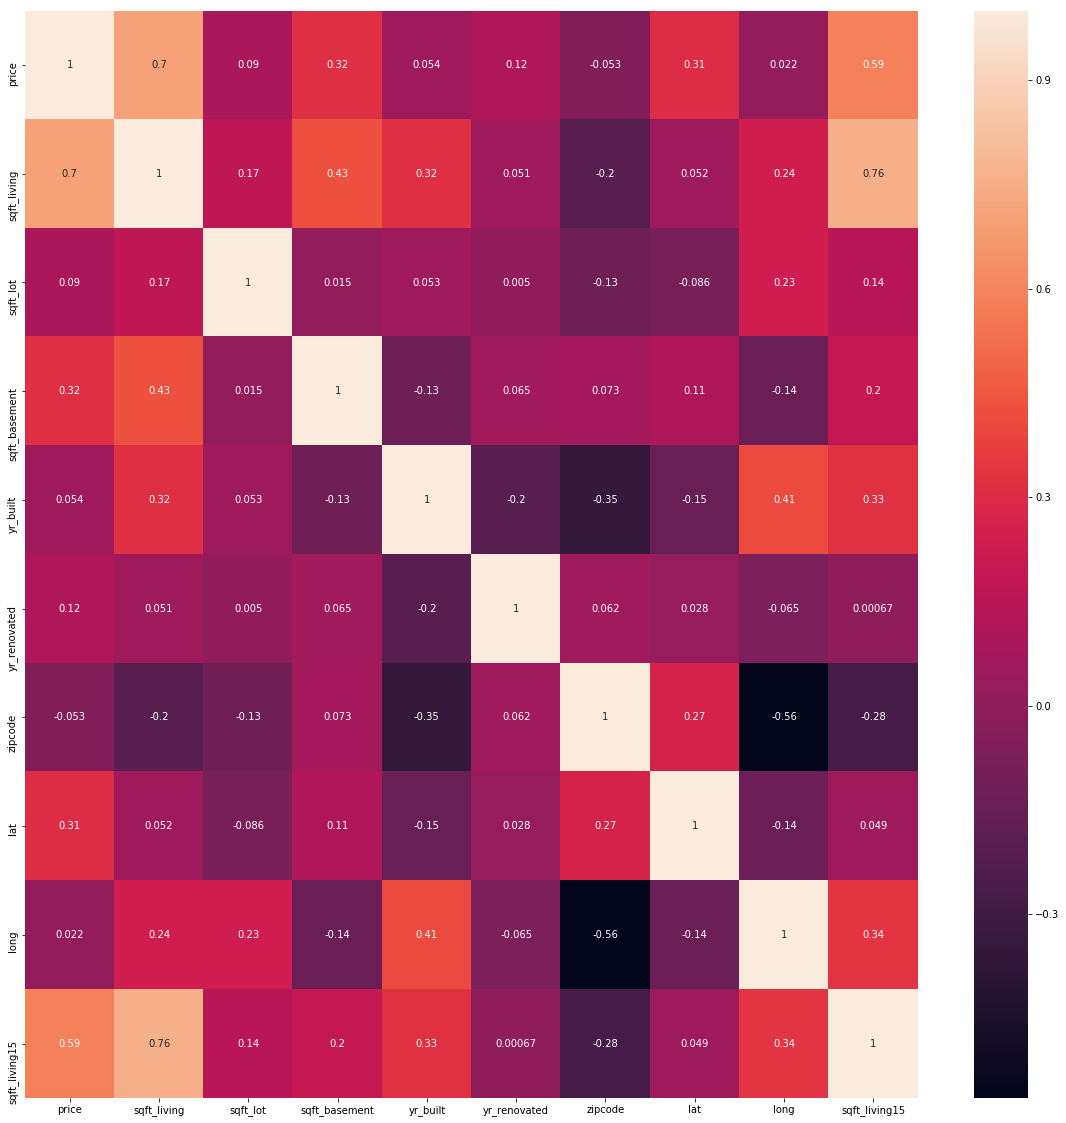

In [27]:
corr = df_features.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

Based on the above heatmap, we have determined:<br>
__*'sqft_living'*__ and __*'sqft_living15'*__ are highly correlated<br>
in light of this information, __*'sqft_living15'*__ will be dropped. 

In [28]:
df_features.drop(['sqft_living15'], axis=1, inplace=True)

In [29]:
#updating the model to reflect the change
corr = df_features.corr()

In [30]:
y = corr['price']
x = corr.drop('price', axis=1)


In [31]:
# running a starting regression model
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2.155
Date:                Sat, 12 Oct 2019   Prob (F-statistic):              0.485
Time:                        23:37:51   Log-Likelihood:                 7.7478
No. Observations:                   9   AIC:                            0.5045
Df Residuals:                       1   BIC:                             2.082
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living       1.0873      0.495      2.198      0.272      -5.199       7.373
sqft_lot         -0.0184      0.350     -0.053      0.967      -4.463       4.426
sqft_basement    -0.2527      0.476     -0.531      0.689      -6.302       5.797
yr_built         -0.2575      0.497     -0.518      0.696      -6.574       6.059
yr_renovated      0.0229      0.339      0.068      0.957      -4.279       4.325
zipcode          -0.1458      0.550     -0.265      0.835      -7.129       6.838
lat               0.3049      0.357      0.855      0.550      -4.228       4.837
long             -0.2370      0.587     -0.403      0.756      -7.700       7.226
==============================================================================
Omnibus:                        4.085   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                0.728
Skew:                           0.462   Prob(JB):                        0.695
Kurtosis:                       4.042   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Above we can see that there are high correlations with price and the following:<br>
- __*bathrooms*__<br>
- __*sqft_lot*__<br>
- __*floors*__<br>
- __*condition*__<br>
- __*yr_renovated*__<br>
We will explore the correlations below

### Now let's separate the data into categorical and continuous


In [22]:
df['bathrooms'] = df['bathrooms'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null category
bathrooms        21596 non-null category
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null category
waterfront       21596 non-null category
view             21596 non-null category
condition        21596 non-null category
grade            21596 non-null category
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
dtypes: category(7), float64(5), int64(5), object(1)
memory usage: 2.7+ MB


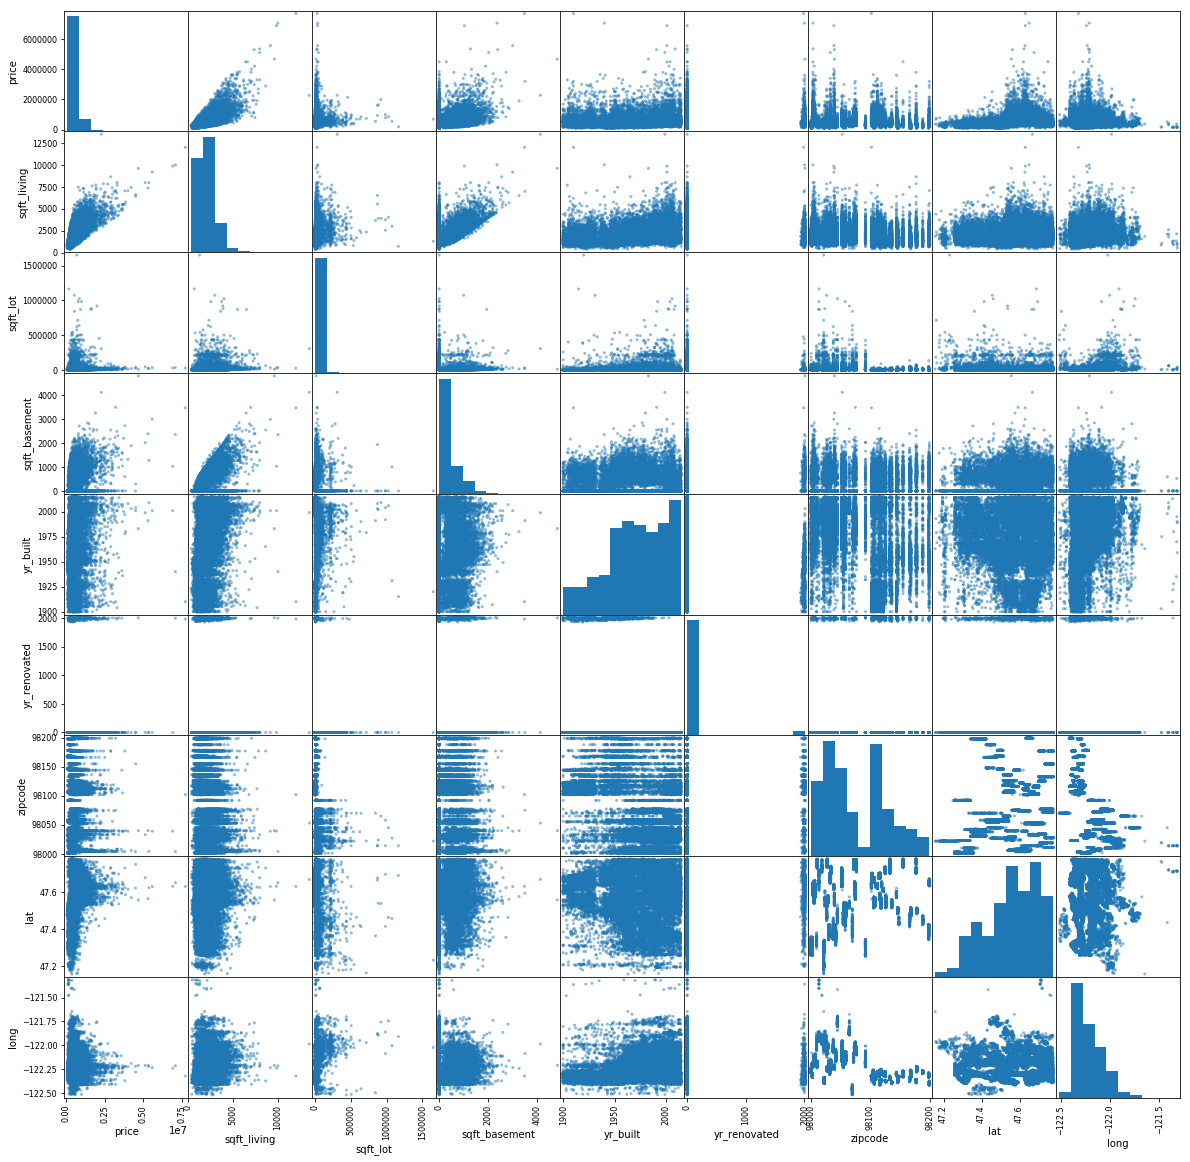

In [33]:
# Looking at the scatterplot to see if there were any visual changes
pd.scatter_matrix(df_features, alpha=0.5, figsize=(20, 20))
plt.show()

### Here are we will look at the continuous data to see how it is correlated with price

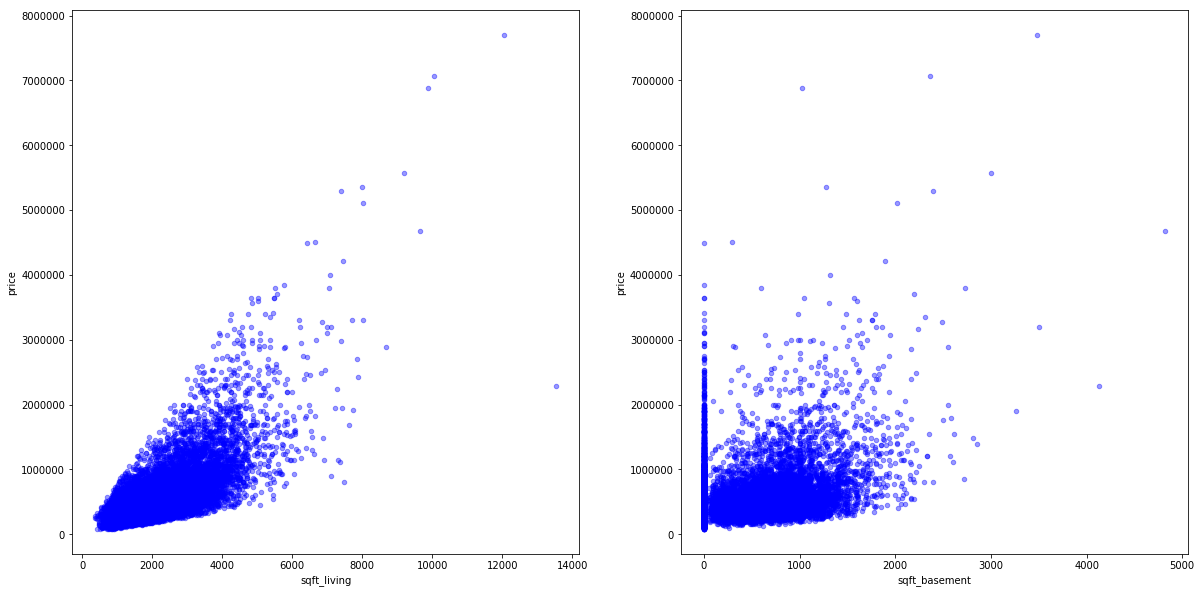

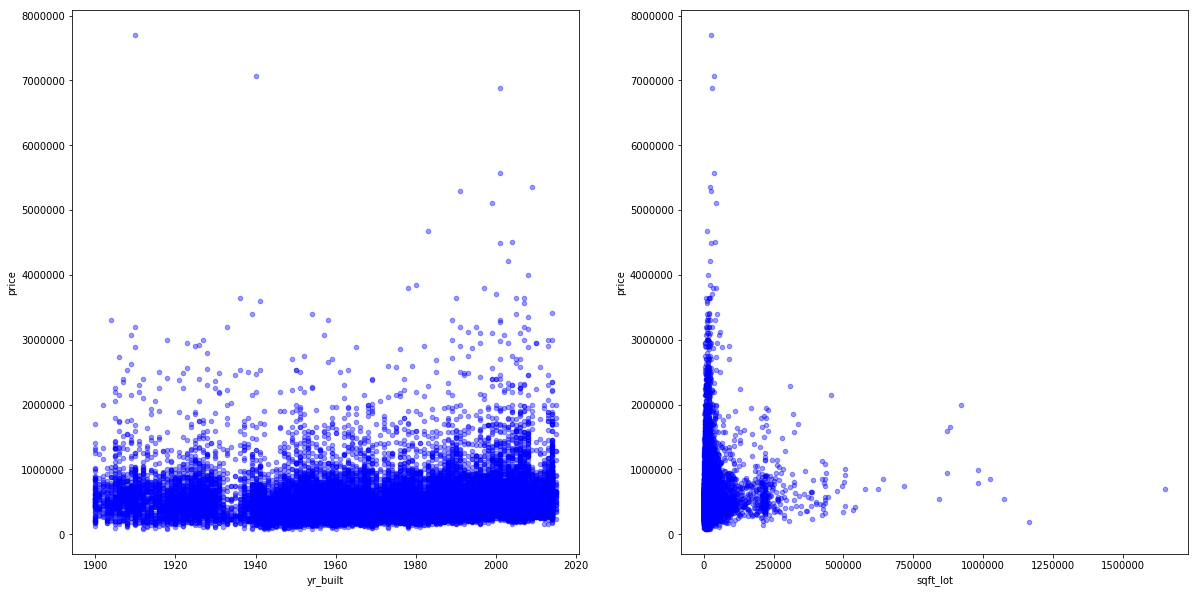

In [44]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for xcol, ax in zip(['sqft_living', 'sqft_basement'], axes):
    df_features.plot(kind='scatter', x=xcol, y="price", ax=ax, alpha=0.4, color='b')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for xcol, ax in zip(['yr_built', 'sqft_lot'], axes):
    df_features.plot(kind='scatter', x=xcol, y="price", ax=ax, alpha=0.4, color='b')
plt.show()

#### It seems that sqft_basement and sqft_living are highly corelated with price. <br>
this makes sense since more square footage means more house

#### Now we will take a look at the categorical data to see what we can draw from it